In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd


In [ ]:
# Load the CSV file containing labels
df = pd.read_csv('/content/drive/MyDrive/Autonomous_Cars/labels_train.csv')

# Define labels for class IDs
labels = {1: 'car', 2: 'truck', 3: 'person', 4: 'bicycle', 5: 'traffic light'}
classes = df['class_id'].unique()


In [ ]:
# Base path for images
base_path = '/content/drive/MyDrive/Autonomous_Cars/images/'


In [ ]:
# Initialize dictionaries for storing images and bounding boxes
boxes = {}
images = {}


In [ ]:
# Loop through each class to get a sample image and bounding box
for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    file_path = os.path.join(base_path, first_row['frame'])  # Construct file path

    # Check if the file exists
    if os.path.exists(file_path):
        # Read and convert image from BGR to RGB for visualization
        images[class_id] = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
        # Store bounding box coordinates
        boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]
    else:
        print(f"File not found: {file_path}")
        images[class_id] = None


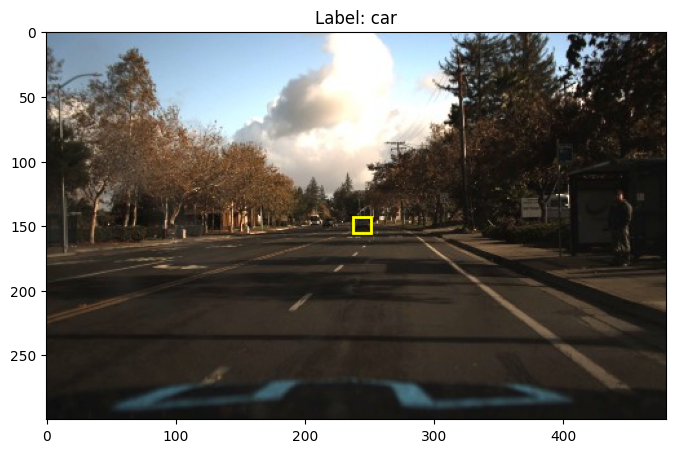

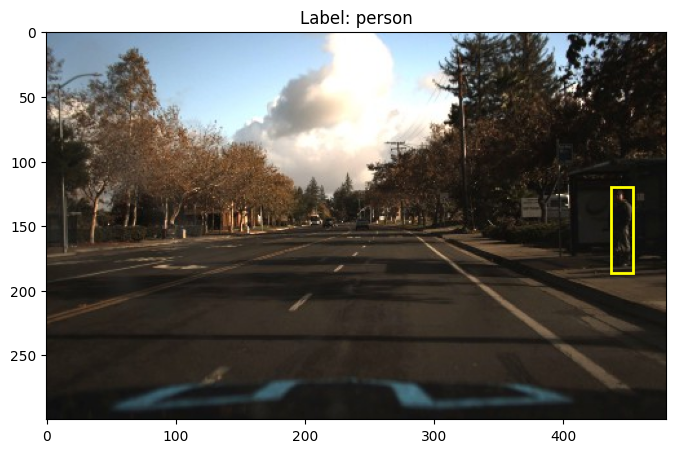

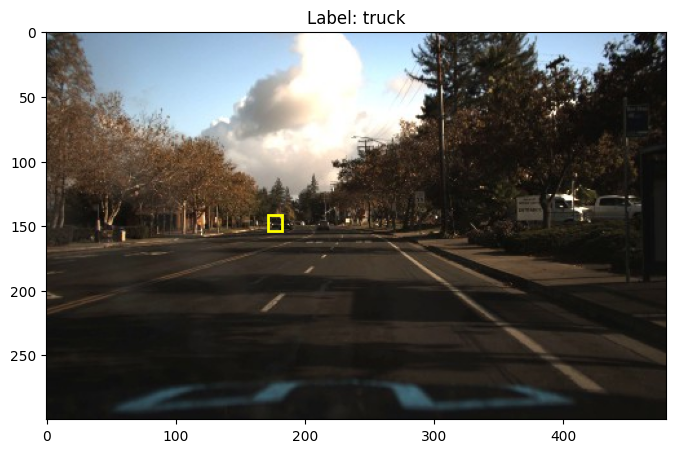

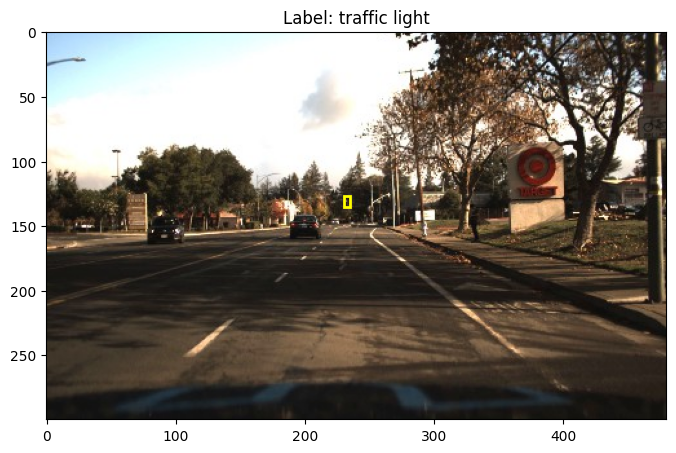

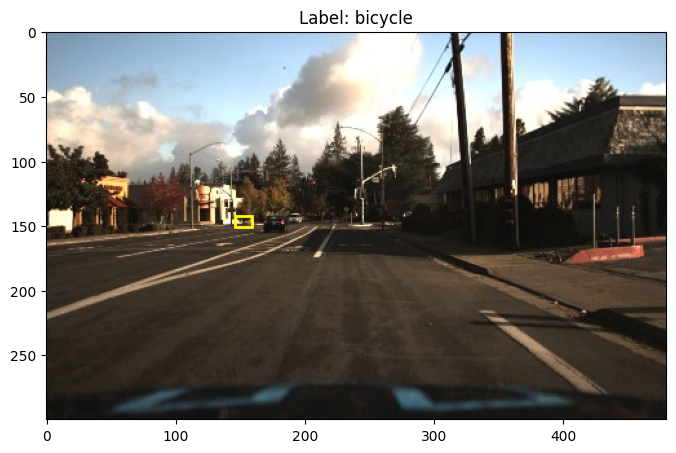

In [ ]:
# Visualize each class with bounding boxes
for i in classes:
    if images[i] is not None:
        xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

        plt.figure(figsize=(8, 10))
        plt.title(f"Label: {labels[i]}")
        plt.imshow(images[i])
        plt.gca().add_patch(Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, color='yellow', fill=False, linewidth=2))
        plt.show()
    else:
        print(f"Skipping class {i}: Image not available.")


In [ ]:
# Define constants for calculation
focal_length = 800  # Replace with actual focal length in pixels
real_world_height = 1.5  # Average height of objects in meters (e.g., height of a car/person)

# Calculate distance for each row in the DataFrame
df['distance'] = df.apply(
    lambda row: (real_world_height * focal_length) / (row['ymax'] - row['ymin'])
                if (row['ymax'] - row['ymin']) > 0 else None,
    axis=1
)


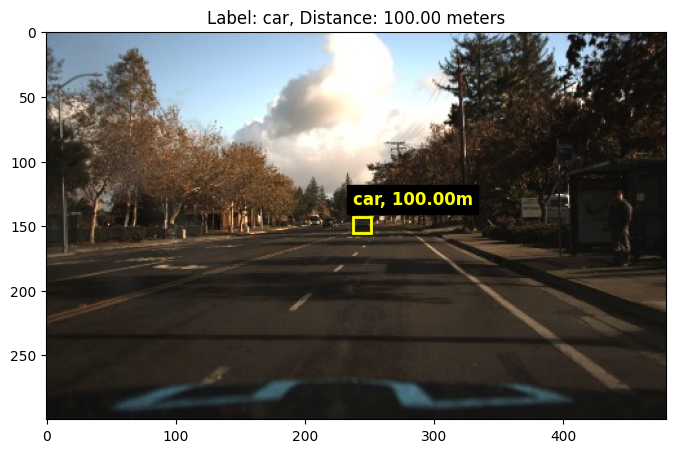

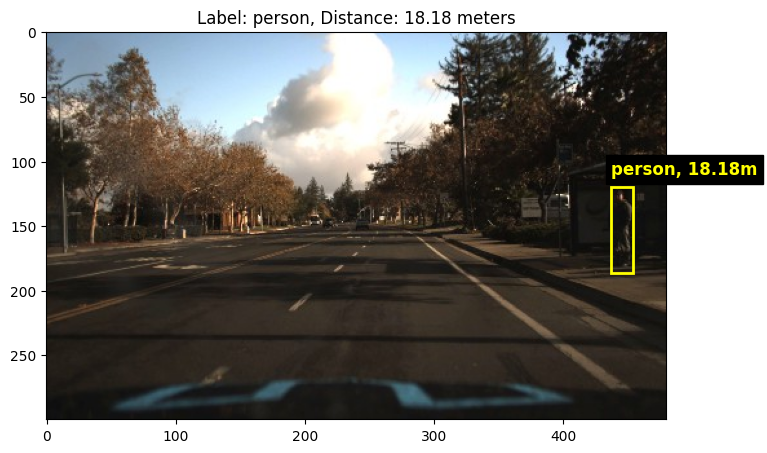

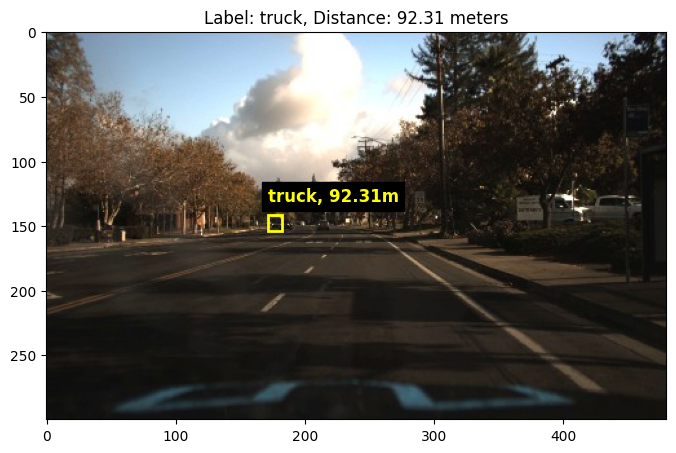

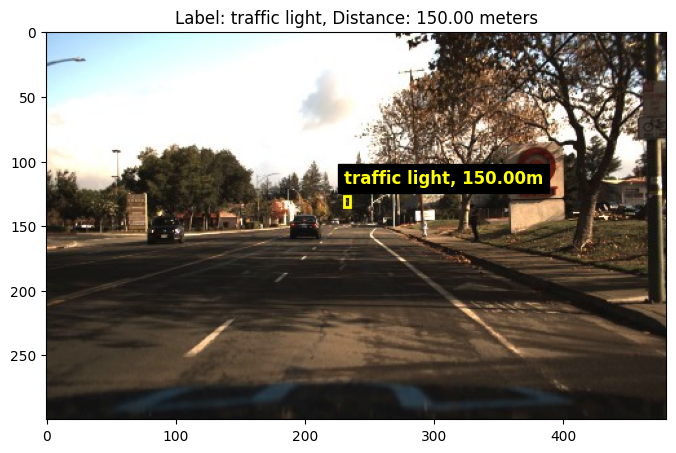

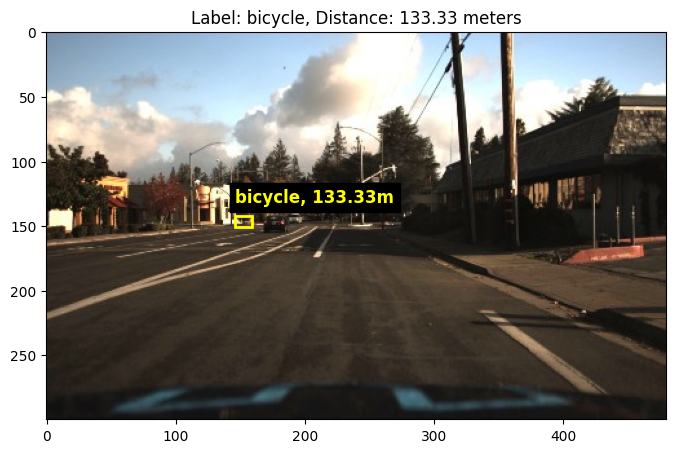

In [ ]:
# Visualize each class with calculated distances
for i in classes:
    if images[i] is not None:
        # Get bounding box coordinates
        xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

        # Get label and calculated distance for the current class
        label = labels[i]
        distance = df[df['class_id'] == i].iloc[0]['distance']

        # Plot image
        plt.figure(figsize=(8, 10))
        plt.title(f"Label: {label}, Distance: {distance:.2f} meters")
        plt.imshow(images[i])
        # Add bounding box
        plt.gca().add_patch(Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, color='yellow', fill=False, linewidth=2))
        # Add text for label and distance
        plt.text(
            xmin, ymin - 10, f"{label}, {distance:.2f}m",
            color='yellow', fontsize=12, weight='bold', backgroundcolor='black'
        )
        plt.show()
    else:
        print(f"Skipping class {i}: Image not available.")


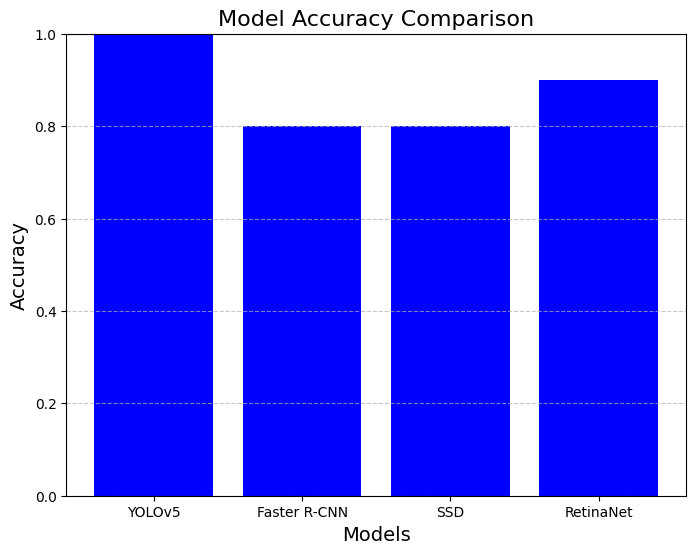

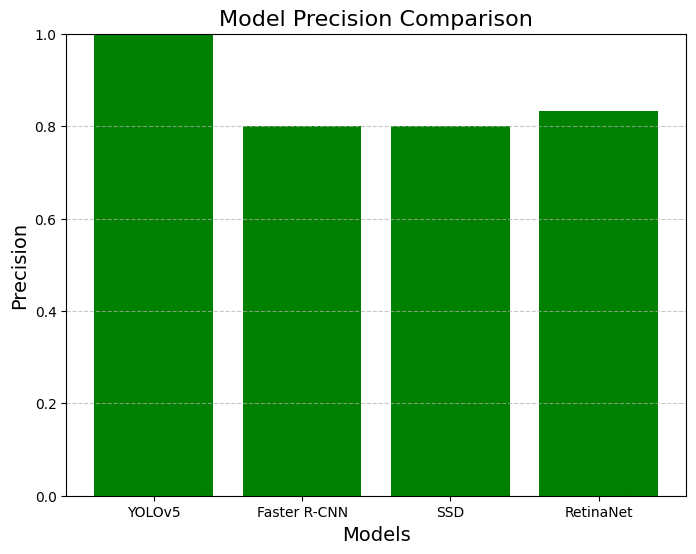

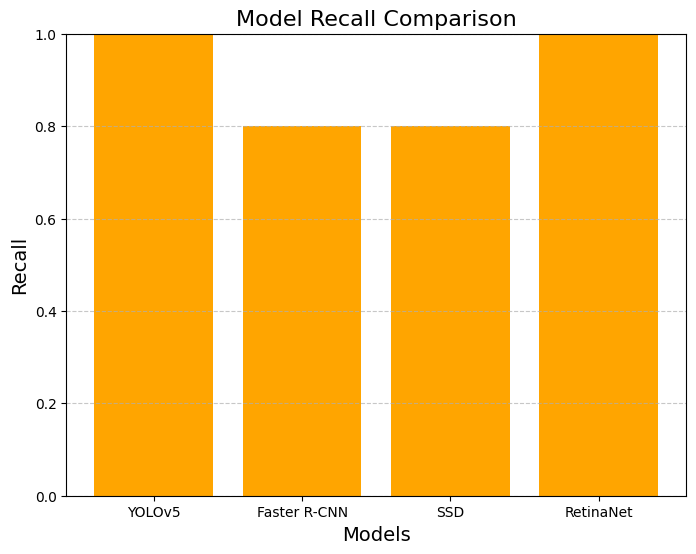

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example ground truth and predictions for multiple models
# Replace these with your actual ground truth and prediction arrays
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Ground truth labels (binary or multi-class)
model_predictions = {
    "YOLOv5": [1, 0, 1, 1, 0, 1, 0, 0, 1, 0],
    "Faster R-CNN": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    "SSD": [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    "RetinaNet": [1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
}

# Dictionaries to store calculated metrics for each model
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

# Calculate metrics for each model
for model, predictions in model_predictions.items():
    accuracy_scores[model] = accuracy_score(y_true, predictions)
    precision_scores[model] = precision_score(y_true, predictions, average="binary")
    recall_scores[model] = recall_score(y_true, predictions, average="binary")

# Convert metrics to lists for plotting
models = list(model_predictions.keys())
accuracy = [accuracy_scores[model] for model in models]
precision = [precision_scores[model] for model in models]
recall = [recall_scores[model] for model in models]

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='blue')
plt.ylim(0.0, 1.0)  # Full range for metrics
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Precision
plt.figure(figsize=(8, 6))
plt.bar(models, precision, color='green')
plt.ylim(0.0, 1.0)
plt.title("Model Precision Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Recall
plt.figure(figsize=(8, 6))
plt.bar(models, recall, color='orange')
plt.ylim(0.0, 1.0)
plt.title("Model Recall Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Recall", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
